# Feature Selection Subspace Ensemble

In [1]:
# evaluate a decision tree on the classification dataset
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=5)
# define the random subspace ensemble model
model = DecisionTreeClassifier()
# define the evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model on the dataset
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Mean Accuracy: 0.794 (0.048)


# Single Feature Selection Method Ensembles

## ANOVA F-statistic Ensemble

In [2]:
# example of an ensemble created from features selected with the anova f-statistic
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.pipeline import Pipeline
from matplotlib import pyplot

# get a voting ensemble of models
def get_ensemble(n_features):
	# define the base models
	models = list()
	# enumerate the features in the training dataset
	for i in range(1, n_features+1):
		# create the feature selection transform
		fs = SelectKBest(score_func=f_classif, k=i)
		# create the model
		model = DecisionTreeClassifier()
		# create the pipeline
		pipe = Pipeline([('fs',fs), ('m', model)])
		# add as a tuple to the list of models for voting
		models.append((str(i),pipe))
	# define the voting ensemble
	ensemble = VotingClassifier(estimators=models, voting='hard')
	return ensemble

# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=5)
# get the ensemble model
ensemble = get_ensemble(X.shape[1])
# define the evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model on the dataset
n_scores = cross_val_score(ensemble, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Mean Accuracy: 0.830 (0.044)


# Mutual Information Ensemble

In [3]:
# example of an ensemble created from features selected with mutual information
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.pipeline import Pipeline
from matplotlib import pyplot

# get a voting ensemble of models
def get_ensemble(n_features):
	# define the base models
	models = list()
	# enumerate the features in the training dataset
	for i in range(1, n_features+1):
		# create the feature selection transform
		fs = SelectKBest(score_func=mutual_info_classif, k=i)
		# create the model
		model = DecisionTreeClassifier()
		# create the pipeline
		pipe = Pipeline([('fs',fs), ('m', model)])
		# add as a tuple to the list of models for voting
		models.append((str(i),pipe))
	# define the voting ensemble
	ensemble = VotingClassifier(estimators=models, voting='hard')
	return ensemble

# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=5)
# get the ensemble model
ensemble = get_ensemble(X.shape[1])
# define the evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model on the dataset
n_scores = cross_val_score(ensemble, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Mean Accuracy: 0.825 (0.045)


In [4]:
# example of an ensemble created from features selected with RFE
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.pipeline import Pipeline
from matplotlib import pyplot

# get a voting ensemble of models
def get_ensemble(n_features):
	# define the base models
	models = list()
	# enumerate the features in the training dataset
	for i in range(1, n_features+1):
		# create the feature selection transform
		fs = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=i)
		# create the model
		model = DecisionTreeClassifier()
		# create the pipeline
		pipe = Pipeline([('fs',fs), ('m', model)])
		# add as a tuple to the list of models for voting
		models.append((str(i),pipe))
	# define the voting ensemble
	ensemble = VotingClassifier(estimators=models, voting='hard')
	return ensemble

# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=5)
# get the ensemble model
ensemble = get_ensemble(X.shape[1])
# define the evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model on the dataset
n_scores = cross_val_score(ensemble, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Mean Accuracy: 0.821 (0.042)


# Combined Feature Selection Ensembles

## Ensemble With Fixed Number of Features

In [6]:
# ensemble of a fixed number features selected by different feature selection methods
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import f_classif
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.pipeline import Pipeline
from matplotlib import pyplot

# get a voting ensemble of models
def get_ensemble(n_features):
	# define the base models
	models = list()
	# anova
	fs = SelectKBest(score_func=f_classif, k=n_features)
	anova = Pipeline([('fs', fs), ('m', DecisionTreeClassifier())])
	models.append(('anova', anova))
	# mutual information
	fs = SelectKBest(score_func=mutual_info_classif, k=n_features)
	mutinfo = Pipeline([('fs', fs), ('m', DecisionTreeClassifier())])
	models.append(('mutinfo', mutinfo))
	# rfe
	fs = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=n_features)
	rfe = Pipeline([('fs', fs), ('m', DecisionTreeClassifier())])
	models.append(('rfe', rfe))
	# define the voting ensemble
	ensemble = VotingClassifier(estimators=models, voting='hard')
	return ensemble

# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
# get the ensemble model
ensemble = get_ensemble(15)
# define the evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model on the dataset
n_scores = cross_val_score(ensemble, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Mean Accuracy: 0.833 (0.038)


>anova: 0.817 (0.039)
>mutinfo: 0.802 (0.039)
>rfe: 0.832 (0.037)
>ensemble: 0.838 (0.042)


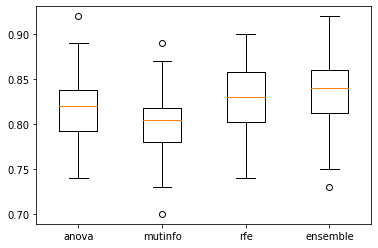

In [7]:
# comparison of ensemble of a fixed number features to single models fit on each set of features
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import f_classif
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.pipeline import Pipeline
from matplotlib import pyplot

# get a voting ensemble of models
def get_ensemble(n_features):
	# define the base models
	models, names = list(), list()
	# anova
	fs = SelectKBest(score_func=f_classif, k=n_features)
	anova = Pipeline([('fs', fs), ('m', DecisionTreeClassifier())])
	models.append(('anova', anova))
	names.append('anova')
	# mutual information
	fs = SelectKBest(score_func=mutual_info_classif, k=n_features)
	mutinfo = Pipeline([('fs', fs), ('m', DecisionTreeClassifier())])
	models.append(('mutinfo', mutinfo))
	names.append('mutinfo')
	# rfe
	fs = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=n_features)
	rfe = Pipeline([('fs', fs), ('m', DecisionTreeClassifier())])
	models.append(('rfe', rfe))
	names.append('rfe')
	# define the voting ensemble
	ensemble = VotingClassifier(estimators=models, voting='hard')
	names.append('ensemble')
	return names, [anova, mutinfo, rfe, ensemble]

# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
# get the ensemble model
names, models = get_ensemble(15)
# evaluate each model
results = list()
for model,name in zip(models,names):
	# define the evaluation method
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model on the dataset
	n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	# report performance
	print('>%s: %.3f (%.3f)' % (name, mean(n_scores), std(n_scores)))
	results.append(n_scores)
# plot the results for comparison
pyplot.boxplot(results, labels=names)
pyplot.show()

## Ensemble With Contiguous Number of Features

In [8]:
# ensemble of many subsets of features selected by multiple feature selection methods
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import f_classif
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier, BaggingClassifier
from sklearn.pipeline import Pipeline
from matplotlib import pyplot

# get a voting ensemble of models
def get_ensemble(n_features_start, n_features_end):
	# define the base models
	models = list()
	for i in range(n_features_start, n_features_end+1):
		# anova
		fs = SelectKBest(score_func=f_classif, k=i)
		anova = Pipeline([('fs', fs), ('m', DecisionTreeClassifier())])
		models.append(('anova'+str(i), anova))
		# mutual information
		fs = SelectKBest(score_func=mutual_info_classif, k=i)
		mutinfo = Pipeline([('fs', fs), ('m', DecisionTreeClassifier())])
		models.append(('mutinfo'+str(i), mutinfo))
		# rfe
		fs = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=i)
		rfe = Pipeline([('fs', fs), ('m', DecisionTreeClassifier())])
		models.append(('rfe'+str(i), rfe))
	# define the voting ensemble
	ensemble = VotingClassifier(estimators=models, voting='hard')
	return ensemble

# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
# get the ensemble model
ensemble = get_ensemble(1, 20)
# define the evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model on the dataset
n_scores = cross_val_score(ensemble, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Mean Accuracy: 0.861 (0.038)


In [10]:
# ensemble of many subsets of features selected by multiple feature selection methods
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import f_classif
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier, StackingClassifier
from sklearn.pipeline import Pipeline
from matplotlib import pyplot

# get a voting ensemble of models
def get_ensemble(n_features_start, n_features_end):
	# define the base models
	models = list()
	for i in range(n_features_start, n_features_end+1):
		# anova
		fs = SelectKBest(score_func=f_classif, k=i)
		anova = Pipeline([('fs', fs), ('m', DecisionTreeClassifier())])
		models.append(('anova'+str(i), anova))
		# mutual information
		fs = SelectKBest(score_func=mutual_info_classif, k=i)
		mutinfo = Pipeline([('fs', fs), ('m', DecisionTreeClassifier())])
		models.append(('mutinfo'+str(i), mutinfo))
		# rfe
		fs = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=i)
		rfe = Pipeline([('fs', fs), ('m', DecisionTreeClassifier())])
		models.append(('rfe'+str(i), rfe))
	# define the voting ensemble
	ensemble = StackingClassifier(estimators=models)
	return ensemble

# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
# get the ensemble model
ensemble = get_ensemble(1, 20)
# define the evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model on the dataset
n_scores = cross_val_score(ensemble, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Mean Accuracy: 0.846 (0.045)


In [18]:
# ensemble of many subsets of features selected by multiple feature selection methods
from numpy import mean
from numpy import std
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold, RepeatedKFold
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import f_classif, f_regression, mutual_info_regression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import VotingRegressor, BaggingClassifier
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import KBinsDiscretizer

# get a voting ensemble of models
def get_ensemble(n_features_start, n_features_end):
	# define the base models
	models = list()
	# normalization
	norm = Pipeline([('s', MinMaxScaler()), ('m', DecisionTreeRegressor())])
	models.append(('norm', norm))
	for i in range(n_features_start, n_features_end+1):
		# anova
		fs = SelectKBest(score_func=f_regression, k=i)
		anova = Pipeline([('fs', fs), ('m', DecisionTreeRegressor())])
		models.append(('anova'+str(i), anova))
		# mutual information
		fs = SelectKBest(score_func=mutual_info_regression, k=i)
		mutinfo = Pipeline([('fs', fs), ('m', DecisionTreeRegressor())])
		models.append(('mutinfo'+str(i), mutinfo))
		# rfe
		fs = RFE(estimator=DecisionTreeRegressor(), n_features_to_select=i)
		rfe = Pipeline([('fs', fs), ('m', DecisionTreeRegressor())])
		models.append(('rfe'+str(i), rfe))
	# define the voting ensemble
	ensemble = VotingRegressor(estimators=models)
	return ensemble

# import data
url= 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
data=pd.read_csv(url, header = None)

dataset=data.values
# prepare data
X = dataset[:,:13]#.reshape(-1,1)
y = dataset[:,13]

# get the ensemble model
ensemble = get_ensemble(1, 13)
# define the evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model on the dataset
n_scores = cross_val_score(ensemble, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# report performance
print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Mean Accuracy: -2.520 (0.397)


In [21]:
# ensemble of many subsets of features selected by multiple feature selection methods
from numpy import mean
import numpy as np
from numpy import std
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold, RepeatedKFold
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import f_classif, f_regression, mutual_info_regression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import VotingRegressor, BaggingClassifier
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import KBinsDiscretizer
np.warnings.filterwarnings('ignore')
from xgboost import XGBRegressor


# get a voting ensemble of models
def get_ensemble(n_features_start, n_features_end):
	# define the base models
	models = list()
	# normalization
	norm = Pipeline([('s', MinMaxScaler()), ('m', XGBRegressor())])
	models.append(('norm', norm))

	# standardization
	std = Pipeline([('s', StandardScaler()), ('m', XGBRegressor())])
	models.append(('std', std))
	poly = Pipeline([('s', PolynomialFeatures(5)), ('m', XGBRegressor())])
	models.append(('poly', poly))
	# robust
	robust = Pipeline([('s', RobustScaler()), ('m', XGBRegressor())])
	models.append(('robust', robust))
	# power
	power = Pipeline([('s', PowerTransformer()), ('m', XGBRegressor())])
	models.append(('power', power))
	# quantile
	quant = Pipeline([('s', QuantileTransformer(n_quantiles=100, output_distribution='normal')), ('m', XGBRegressor())])
	models.append(('quant', quant))
	# kbins
	kbins = Pipeline([('s', KBinsDiscretizer(n_bins=20, encode='ordinal')), ('m', XGBRegressor())])
	models.append(('kbins', kbins))
	for i in range(n_features_start, n_features_end+1):
		# anova
		fs = SelectKBest(score_func=f_regression, k=i)
		anova = Pipeline([('fs', fs), ('m', DecisionTreeRegressor())])
		models.append(('anova'+str(i), anova))
		# mutual information
		fs = SelectKBest(score_func=mutual_info_regression, k=i)
		mutinfo = Pipeline([('fs', fs), ('m', DecisionTreeRegressor())])
		models.append(('mutinfo'+str(i), mutinfo))
		# rfe
		fs = RFE(estimator=DecisionTreeRegressor(), n_features_to_select=i)
		rfe = Pipeline([('fs', fs), ('m', DecisionTreeRegressor())])
		models.append(('rfe'+str(i), rfe))
	# define the voting ensemble
	ensemble = VotingRegressor(estimators=models)
	return ensemble

# import data
url= 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
data=pd.read_csv(url, header = None)

dataset=data.values
# prepare data
X = dataset[:,:13]#.reshape(-1,1)
y = dataset[:,13]

# get the ensemble model
ensemble = get_ensemble(1, 13)
# define the evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model on the dataset
n_scores = cross_val_score(ensemble, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# report performance
print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Mean Accuracy: -2.368 (0.386)


In [29]:
# ensemble of many subsets of features selected by multiple feature selection methods
from numpy import mean
import numpy as np
from numpy import std
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold, RepeatedKFold
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import f_classif, f_regression, mutual_info_regression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import VotingRegressor, BaggingClassifier
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import KBinsDiscretizer
np.warnings.filterwarnings('ignore')
from xgboost import XGBRegressor
from sklearn.decomposition import PCA


# get a voting ensemble of models
def get_ensemble(n_features_start, n_features_end):
	# define the base models
	models = list()
	# normalization
	norm = Pipeline([('s', PCA()), ('m', DecisionTreeRegressor())])
	models.append(('norm', norm))

	for i in range(n_features_start, n_features_end+1):

		# anova
		fs = SelectKBest(score_func=f_regression, k=i)
		anova = Pipeline([('fs', fs), ('m', DecisionTreeRegressor())])
		models.append(('anova'+str(i), anova))
		# mutual information
		fs = SelectKBest(score_func=mutual_info_regression, k=i)
		mutinfo = Pipeline([('fs', fs), ('m', DecisionTreeRegressor())])
		models.append(('mutinfo'+str(i), mutinfo))
		# rfe
		fs = RFE(estimator=DecisionTreeRegressor(), n_features_to_select=i)
		rfe = Pipeline([('fs', fs), ('m', DecisionTreeRegressor())])
		models.append(('rfe'+str(i), rfe))
	# define the voting ensemble
	ensemble = VotingRegressor(estimators=models)
	return ensemble

# import data
url= 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
data=pd.read_csv(url, header = None)

dataset=data.values
# prepare data
X = dataset[:,:13]#.reshape(-1,1)
y = dataset[:,13]

# get the ensemble model
ensemble = get_ensemble(1, 13)
# define the evaluation method
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
# evaluate the model on the dataset
n_scores = cross_val_score(ensemble, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# report performance
print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Mean Accuracy: -2.644 (0.202)
